In [1]:
#import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#ignore warnings
import warnings
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv('dataset.csv',encoding='windows-1252')

In [3]:
# edit data type for date data 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<h2> let's find the most valuable customers <h2>


In [4]:
top_customers = df.groupby("Customer Name").Sales.sum().sort_values(ascending = False).head(20).reset_index()
top_customers

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


In [5]:
top_customer=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customer_df=top_customer.reset_index()

# Create an interactive bar chart
fig = px.bar(
    top_customer_df,
    x='Customer Name',
    y='Sales',
    title="Top 10 Most Valuable Customers by Sales",
    labels={'Sales': 'Total Sales ($)', 'Customer Name': 'Customer'},
    hover_data={'Customer Name': True, 'Sales': True},  # Hover shows sales values
    text='Sales',  # Show sales values on bars
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45,width=700,height=650)  # Rotate x-axis labels for readability

fig.show()


#### Who are the most loyal customers (repeat buyers)?

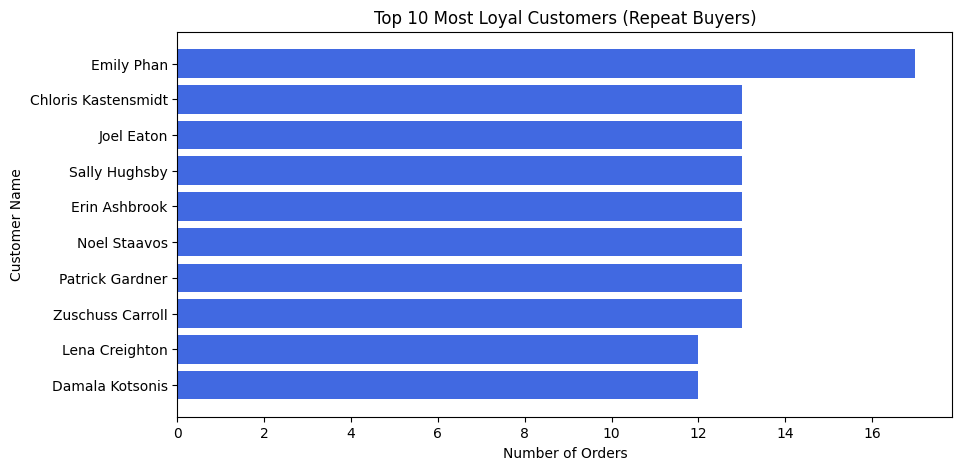

In [6]:
most_loyal_customer= df.groupby('Customer Name')['Order ID'].nunique().sort_values(ascending=False).head(10)
most_loyal_customer_df=most_loyal_customer.reset_index()


# Take top 10 loyal customers

plt.figure(figsize=(10,5))
plt.barh(most_loyal_customer_df["Customer Name"], most_loyal_customer_df["Order ID"], color='royalblue')
plt.xlabel("Number of Orders")
plt.ylabel("Customer Name")
plt.title("Top 10 Most Loyal Customers (Repeat Buyers)")
plt.gca().invert_yaxis()
plt.show()

#### What is the average revenue per customer?

In [7]:
avg_rev_per_cust=df.groupby('Customer Name')['Sales'].sum().mean()
avg_rev_per_cust

np.float64(2896.848499747793)

#### What is the distribution of order frequency per customer?

In [8]:
order_frequency = df.groupby("Customer ID")["Order ID"].nunique()
order_frequency

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Order ID, Length: 793, dtype: int64

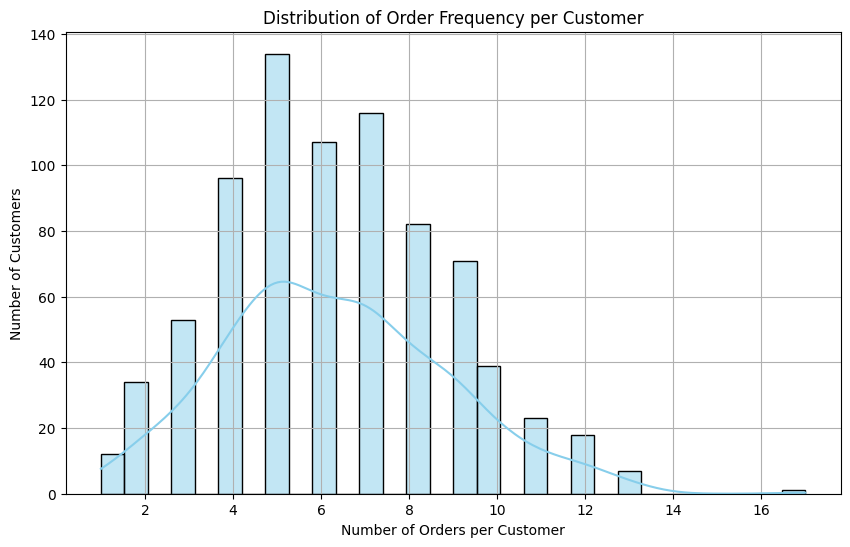

In [9]:
# Count number of orders per customer
order_frequency = df.groupby("Customer ID")["Order ID"].nunique()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(order_frequency, bins=30, kde=True, color="skyblue")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")
plt.title("Distribution of Order Frequency per Customer")
plt.grid(True)
plt.show()

#### What percentage of customers contribute to 80% of the revenue (Pareto 80/20 rule)?


49.81% of customers contribute to 80% of the revenue.


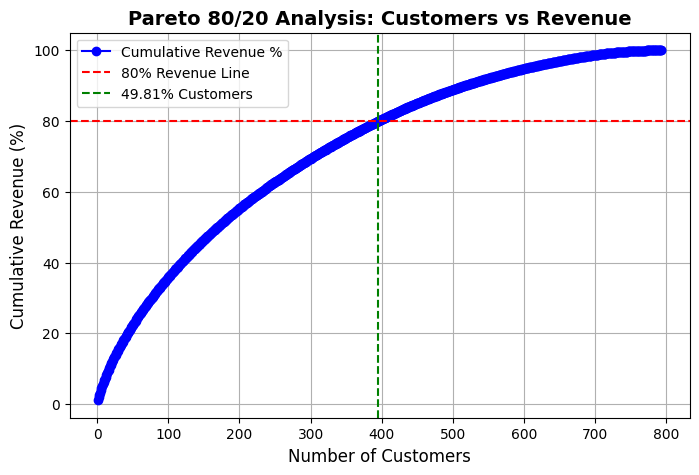

In [10]:
# Aggregate total sales per customer
customer_revenue = df.groupby("Customer ID")["Sales"].sum().reset_index()

# Sort customers by revenue (highest to lowest)
customer_revenue = customer_revenue.sort_values(by="Sales", ascending=False)

# Calculate cumulative revenue percentage
total_revenue= customer_revenue["Sales"].sum()
customer_revenue["Cumulative Revenue"] = customer_revenue["Sales"].cumsum()
customer_revenue["Cumulative Revenue %"] = (customer_revenue["Cumulative Revenue"] / total_revenue) * 100

# Find the number of customers contributing to 80% of revenue

num_customers_80 = (customer_revenue["Cumulative Revenue %"] <= 80).sum()
percent_customers = (num_customers_80 / len(customer_revenue)) * 100

print(f"{percent_customers:.2f}% of customers contribute to 80% of the revenue.")

# Visualization - Pareto Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(customer_revenue) + 1), customer_revenue["Cumulative Revenue %"], marker="o", color="b", label="Cumulative Revenue %")
plt.axhline(y=80, color="r", linestyle="--", label="80% Revenue Line")
plt.axvline(x=num_customers_80, color="g", linestyle="--", label=f"{percent_customers:.2f}% Customers")
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Cumulative Revenue (%)", fontsize=12)
plt.title("Pareto 80/20 Analysis: Customers vs Revenue", fontsize=14, fontweight="bold")
plt.legend()
plt.grid()

plt.show()

#### What percentage of total revenue comes from new vs. repeat customers?

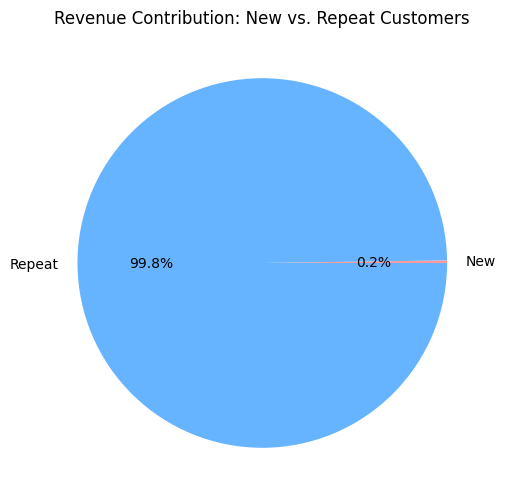

In [11]:
# Count the number of unique orders per customer
order_counts = df.groupby('Customer ID')['Order ID'].nunique()
customer_type = order_counts.apply(lambda x: 'New' if x == 1 else 'Repeat')

# Compute sales by customer type (without modifying df)
revenue_by_type = df.groupby(df['Customer ID'].map(customer_type))['Sales'].sum()

# Ensure there's data to plot
if revenue_by_type.empty:
    print("Error: No revenue data found for New vs. Repeat customers.")
else:
    # Calculate percentage
    revenue_percentage = (revenue_by_type / revenue_by_type.sum()) * 100

    # 📊 Visualize with a Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(revenue_percentage, labels=revenue_percentage.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    plt.title("Revenue Contribution: New vs. Repeat Customers")
    plt.show()

#### find out which states generated the highest revenue
##### Top 10 states generated the highest revenue

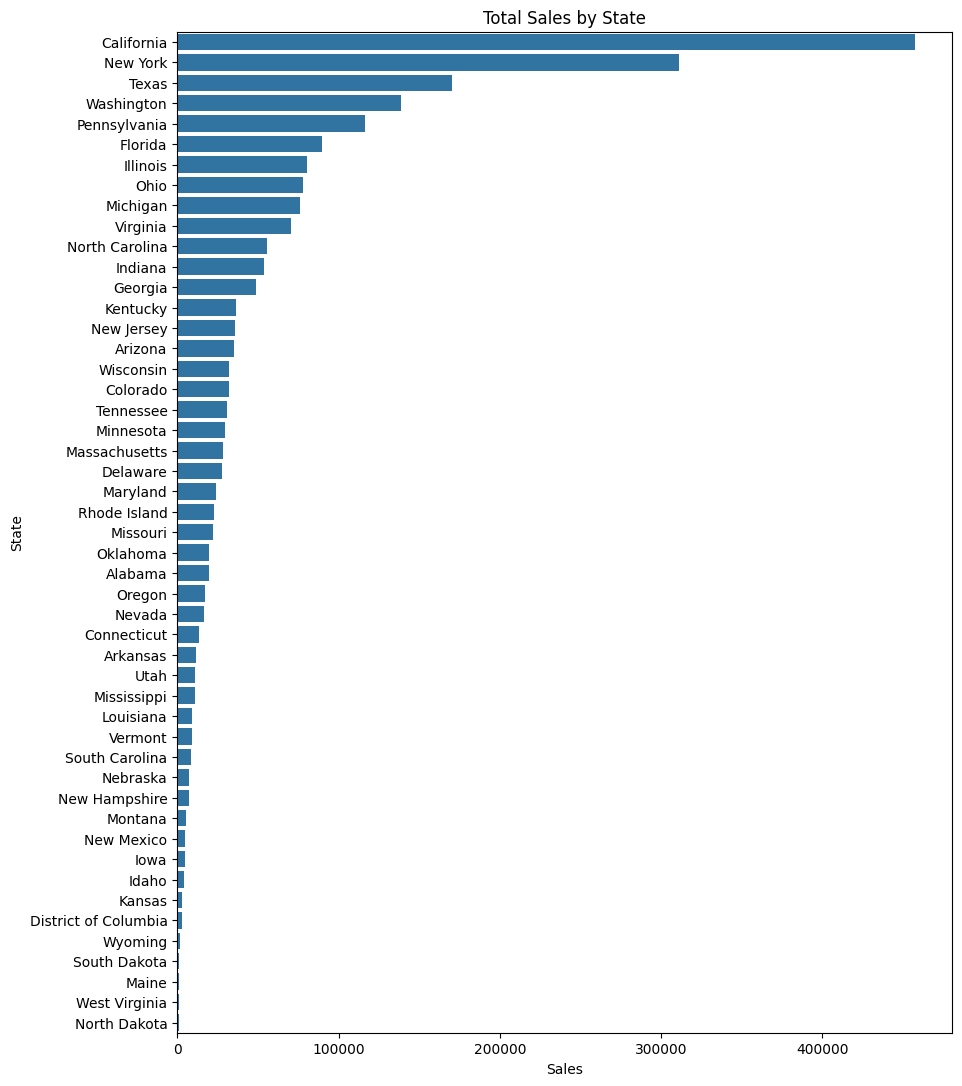

In [12]:
# Group by state and calculaye the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horinzontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()


#### What are the top states with the highest number of orders?

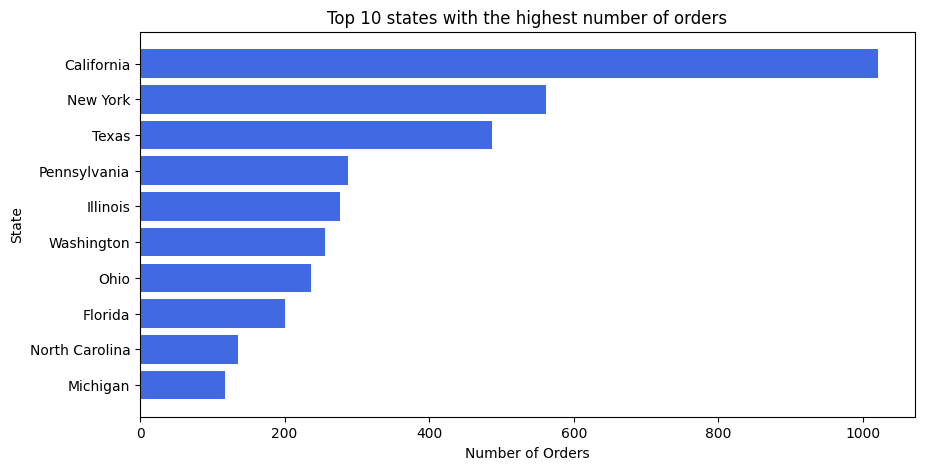

In [13]:
most_state_order= df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).head(10)
most_state_order_df=most_state_order.reset_index()


# Take top 10 states with the highest number of orders

plt.figure(figsize=(10,5))
plt.barh(most_state_order_df["State"], most_state_order_df["Order ID"], color='royalblue')
plt.xlabel("Number of Orders")
plt.ylabel("State")
plt.title("Top 10 states with the highest number of orders")
plt.gca().invert_yaxis()
plt.show()

In [14]:
top_state=df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_state_df=top_state.reset_index()

# Create an interactive bar chart
fig = px.bar(
    top_state_df,
    x='State',
    y='Sales',
    title="Top 10 states generated the highest revenue",
    labels={'Sales': 'Total Sales ($)', 'State': 'State'},
    hover_data={'State': True, 'Sales': True},  # Hover shows sales values
    text='Sales',  # Show sales values on bars
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45,width=700,height=650)  # Rotate x-axis labels for readability

fig.show()


In [15]:
# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio

# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

#### find out which cities generated highest revenue


In [16]:
top_cities=df.groupby("City").Sales.sum().sort_values(ascending=False).head(20).reset_index().round(2)
top_cities


,City,Sales
0,New York City,256368.16
1,Los Angeles,175851.34
2,Seattle,119540.74
3,San Francisco,112669.09
4,Philadelphia,109077.01
5,Houston,64504.76
6,Chicago,48539.54
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Springfield,43054.34


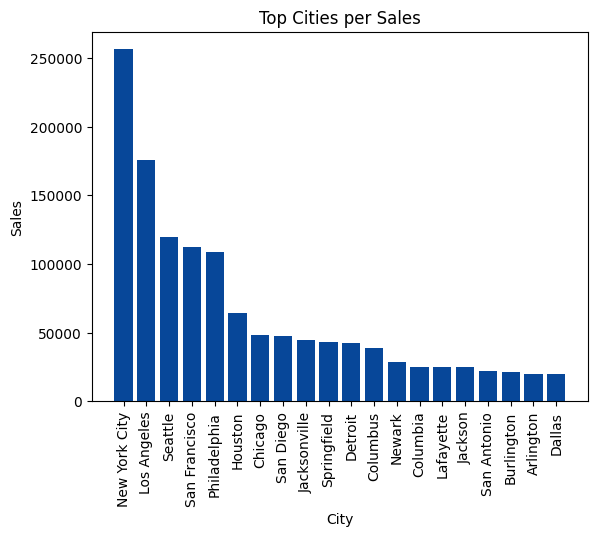

In [17]:
plt.bar(top_cities["City"], top_cities["Sales"], color="#074799")
plt.title("Top Cities per Sales")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

##### Top 10 cities generated the highest revenue

In [18]:
top_state=df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_state_df=top_state.reset_index()

# Create an interactive bar chart
fig = px.bar(
    top_state_df,
    x='City',
    y='Sales',
    title="Top 10 cities generated the highest revenue",
    labels={'Sales': 'Total Sales ($)', 'City': 'City'},
    hover_data={'City': True, 'Sales': True},  # Hover shows sales values
    text='Sales',  # Show sales values on bars
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45,width=700,height=650)  # Rotate x-axis labels for readability

fig.show()


#### What are the top cities with the highest number of orders?

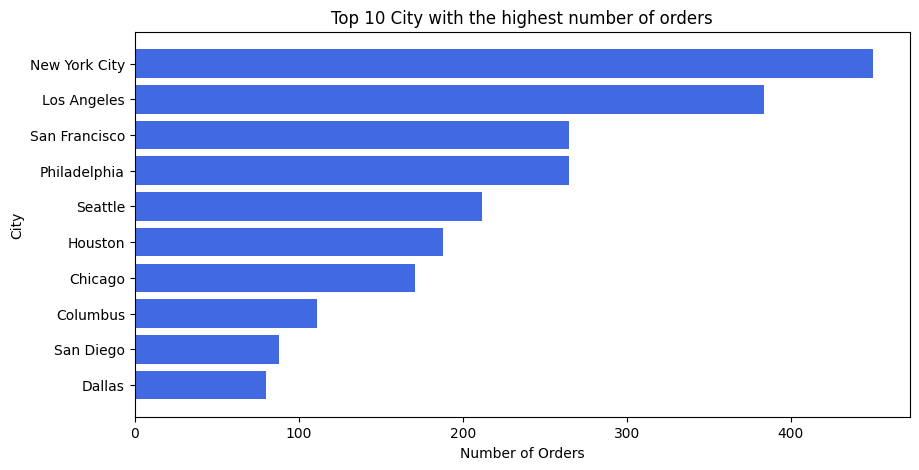

In [19]:
most_city_order= df.groupby('City')['Order ID'].nunique().sort_values(ascending=False).head(10)
most_city_order_df=most_city_order.reset_index()


# Take top 10 City with the highest number of orders

plt.figure(figsize=(10,5))
plt.barh(most_city_order_df["City"], most_city_order_df["Order ID"], color='royalblue')
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.title("Top 10 City with the highest number of orders")
plt.gca().invert_yaxis()
plt.show()

#### Which states/cities have the lowest sales performance?

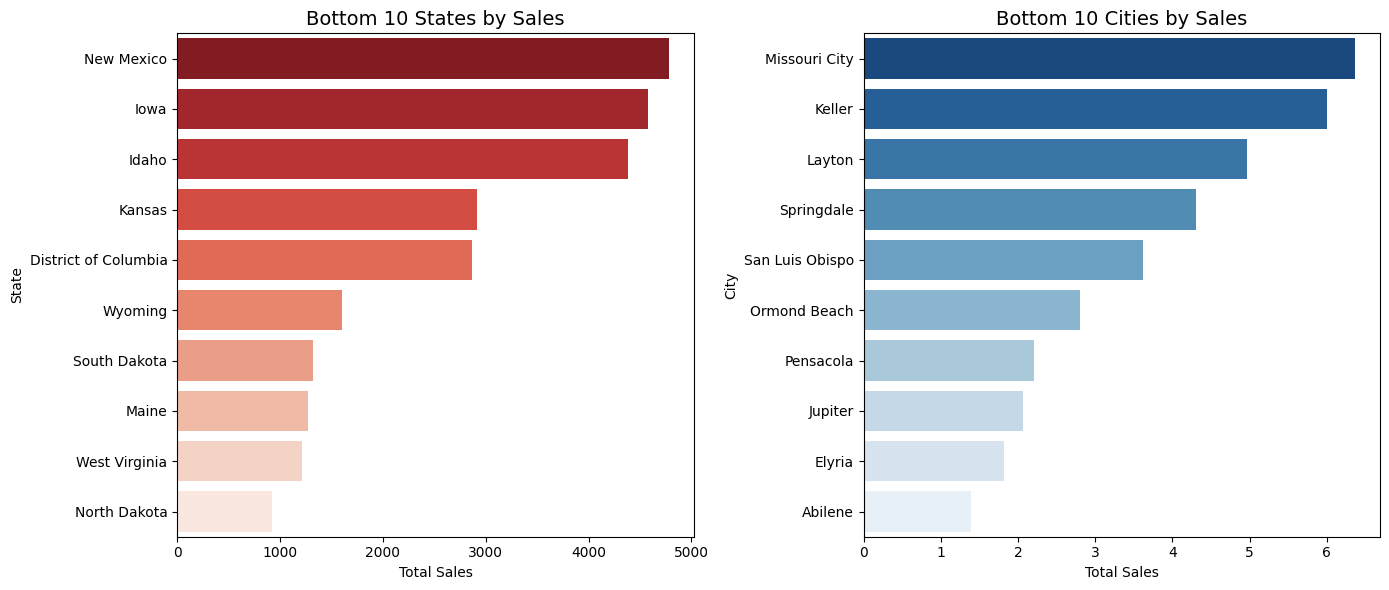

In [20]:
# Aggregate sales by state and city
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).tail(10)
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).tail(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(x=state_sales.values, y=state_sales.index, ax=axes[0], palette="Reds_r")  
axes[0].set_title("Bottom 10 States by Sales", fontsize=14)
axes[0].set_xlabel("Total Sales")
axes[0].set_ylabel("State")

sns.barplot(x=city_sales.values, y=city_sales.index, ax=axes[1], palette="Blues_r") 
axes[1].set_title("Bottom 10 Cities by Sales", fontsize=14)
axes[1].set_xlabel("Total Sales")
axes[1].set_ylabel("City")

plt.tight_layout()
plt.show()

# Dictionary of state abbreviations
state_abbr = {
    'Texas': 'TX', 'Illinois': 'IL', 'Pennsylvania': 'PA', 'Kentucky': 'KY', 'California': 'CA',
    'Georgia': 'GA', 'Virginia': 'VA', 'Delaware': 'DE', 'Louisiana': 'LA', 'Ohio': 'OH',
    'South Carolina': 'SC', 'Oregon': 'OR', 'Arizona': 'AZ', 'Arkansas': 'AR', 'Michigan': 'MI',
    'Tennessee': 'TN', 'Nevada': 'NV', 'South Dakota': 'SD', 'New York': 'NY', 'Wisconsin': 'WI',
    'Florida': 'FL', 'Washington': 'WA', 'New Jersey': 'NJ', 'Missouri': 'MO', 'Indiana': 'IN',
    'North Carolina': 'NC', 'Colorado': 'CO', 'Utah': 'UT', 'Mississippi': 'MS', 'Minnesota': 'MN',
    'Iowa': 'IA', 'New Mexico': 'NM', 'Massachusetts': 'MA', 'Alabama': 'AL', 'Montana': 'MT',
    'Idaho': 'ID', 'Maryland': 'MD', 'Connecticut': 'CT', 'New Hampshire': 'NH', 'Oklahoma': 'OK',
    'Nebraska': 'NE', 'Maine': 'ME', 'Kansas': 'KS', 'Rhode Island': 'RI',
    'District of Columbia': 'DC', 'Vermont': 'VT', 'Wyoming': 'WY', 'North Dakota': 'ND',
    'West Virginia': 'WV'
}

# Convert state_sales to a DataFrame for easier mapping
state_sales = state_sales.reset_index()

# Add State Abbreviation Column to state_sales
state_sales["State_Abbr"] = state_sales["State"].map(state_abbr)

# Create a choropleth map using Plotly
fig = px.choropleth(
    state_sales, 
    locations="State_Abbr",  # Uses abbreviations like TX, CA, NY
    locationmode="USA-states",  # Maps them to US states
    color="Sales",  # Color scale based on Sales
    scope="usa",  # Focuses on USA
    title="Sales by State",
    color_continuous_scale="Reds",
    hover_name="State"  # Shows full state name in the tooltip
)

fig.show()



#### Which Region has the highest sales?

In [21]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [22]:

top_regions = df.groupby("Region").Sales.sum().sort_values(ascending=False).reset_index().round(2)
top_regions

,Region,Sales
0,West,725457.82
1,East,678781.24
2,Central,501239.89
3,South,391721.90


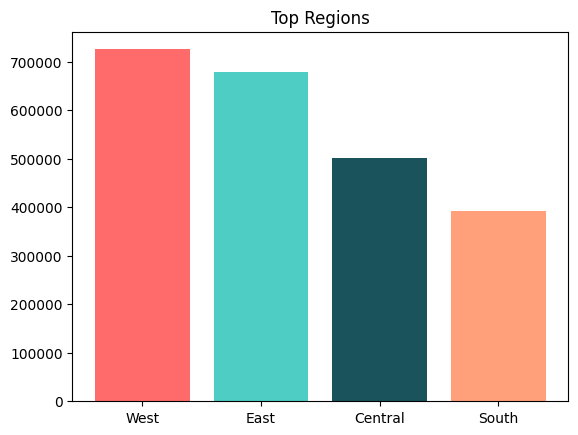

<Figure size 800x500 with 0 Axes>

In [23]:
plt.bar(top_regions["Region"] , top_regions["Sales"] , color = ['#FF6B6B', '#4ECDC4', '#1A535C', '#FFA07A'])
plt.title("Top Regions")
plt.figure(figsize=(8, 5))
plt.tight_layout()
plt.show()



In [24]:

# Aggregate revenue by state and region
state_revenue = df.groupby("State")["Sales"].sum().reset_index()
region_revenue = df.groupby("Region")["Sales"].sum().reset_index()

# Add state abbreviations
state_abbr = {
    'Texas': 'TX', 'Illinois': 'IL', 'Pennsylvania': 'PA', 'Kentucky': 'KY', 'California': 'CA',
    'Georgia': 'GA', 'Virginia': 'VA', 'Delaware': 'DE', 'Louisiana': 'LA', 'Ohio': 'OH',
    'South Carolina': 'SC', 'Oregon': 'OR', 'Arizona': 'AZ', 'Arkansas': 'AR', 'Michigan': 'MI',
    'Tennessee': 'TN', 'Nevada': 'NV', 'South Dakota': 'SD', 'New York': 'NY', 'Wisconsin': 'WI',
    'Florida': 'FL', 'Washington': 'WA', 'New Jersey': 'NJ', 'Missouri': 'MO', 'Indiana': 'IN',
    'North Carolina': 'NC', 'Colorado': 'CO', 'Utah': 'UT', 'Mississippi': 'MS', 'Minnesota': 'MN',
    'Iowa': 'IA', 'New Mexico': 'NM', 'Massachusetts': 'MA', 'Alabama': 'AL', 'Montana': 'MT',
    'Idaho': 'ID', 'Maryland': 'MD', 'Connecticut': 'CT', 'New Hampshire': 'NH', 'Oklahoma': 'OK',
    'Nebraska': 'NE', 'Maine': 'ME', 'Kansas': 'KS', 'Rhode Island': 'RI',
    'District of Columbia': 'DC', 'Vermont': 'VT', 'Wyoming': 'WY', 'North Dakota': 'ND',
    'West Virginia': 'WV'
}
state_revenue["State_Abbr"] = state_revenue["State"].map(state_abbr)
fig = px.choropleth(
    state_revenue, 
    locations="State_Abbr",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    title="Revenue by State",
    color_continuous_scale="Reds",
    hover_name="State"
)

fig.show()



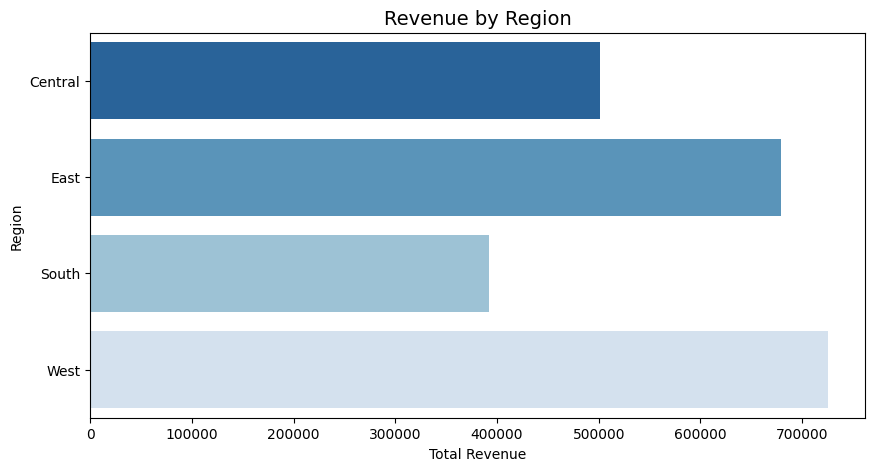

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Sales", y="Region", data=region_revenue, hue="Region", palette="Blues_r")
plt.title("Revenue by Region", fontsize=14)
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.show()

##### West region has the highest sale

In [26]:
# Create dataframe for West region

df_wes=df[df['Region']=='West']
df_sou=df[df['Region']=='South']
df_est=df[df['Region']=='East']
df_cen=df[df['Region']=='Central']



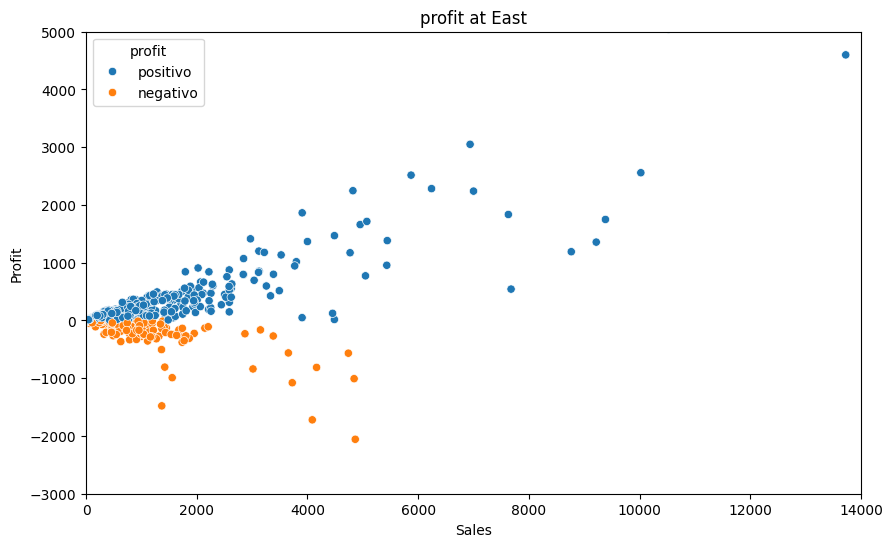

In [27]:
# Distribution of sales and profits by customers in the Central region

df_est_customer=pd.DataFrame(df_est.groupby('Customer Name')['Sales'].sum())
df_est_customer['Profit']=pd.DataFrame(df_est.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'negativo'
    else:
        return 'positivo'

df_est_customer.loc[:,'profit']=df_est_customer.loc[:,'Profit'].apply(type)

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_est_customer, hue='profit',x='Sales',y='Profit')
plt.title("profit at East") 
plt.xlim(0, 14000)
plt.ylim(-3000, 5000)
plt.show()

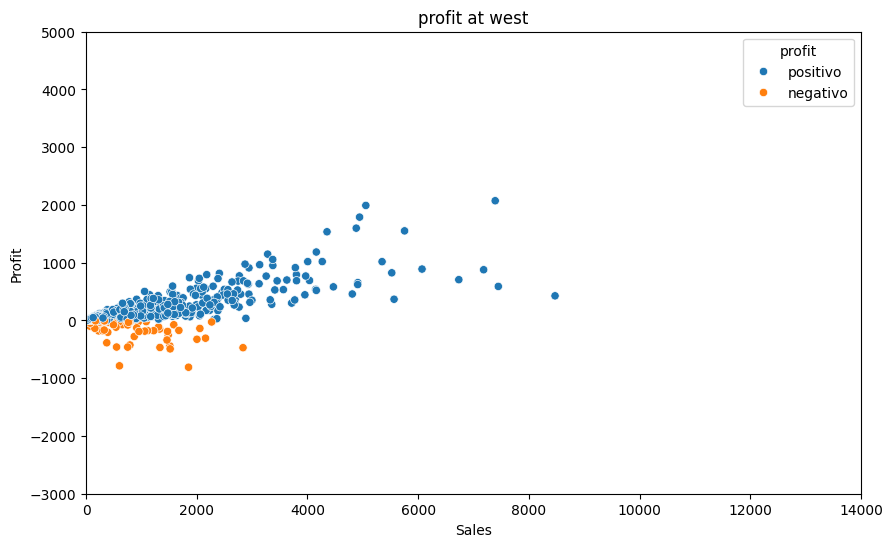

In [28]:
# Distribution of sales and profits by customers in the Central region

df_wes_customer=pd.DataFrame(df_wes.groupby('Customer Name')['Sales'].sum())
df_wes_customer['Profit']=pd.DataFrame(df_wes.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'negativo'
    else:
        return 'positivo'

df_wes_customer.loc[:,'profit']=df_wes_customer.loc[:,'Profit'].apply(type)

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_wes_customer, hue='profit',x='Sales',y='Profit')
plt.title("profit at west") 
plt.xlim(0, 14000)
plt.ylim(-3000, 5000)
plt.show()

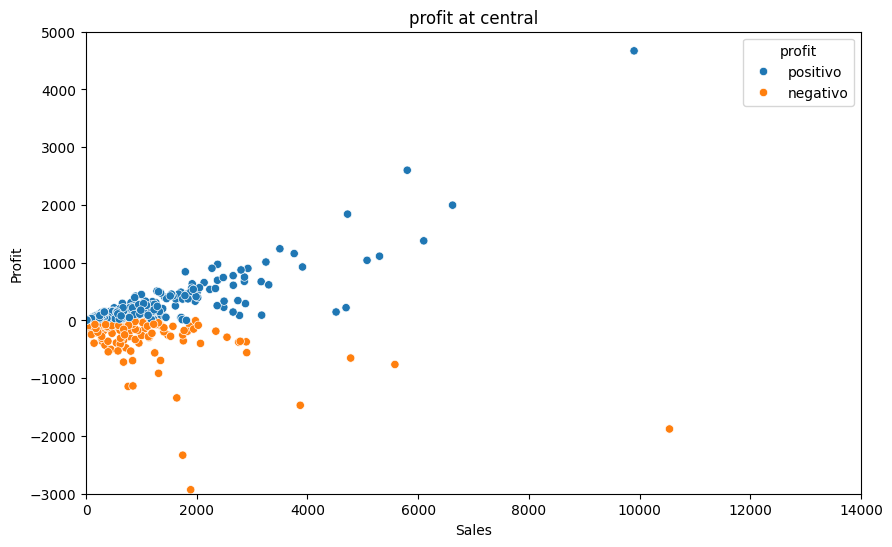

In [29]:
# Distribution of sales and profits by customers in the Central region

df_cen_customer=pd.DataFrame(df_cen.groupby('Customer Name')['Sales'].sum())
df_cen_customer['Profit']=pd.DataFrame(df_cen.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'negativo'
    else:
        return 'positivo'

df_cen_customer.loc[:,'profit']=df_cen_customer.loc[:,'Profit'].apply(type)

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_cen_customer, hue='profit',x='Sales',y='Profit')
plt.title("profit at central") 
plt.xlim(0, 14000)
plt.ylim(-3000, 5000)
plt.show()

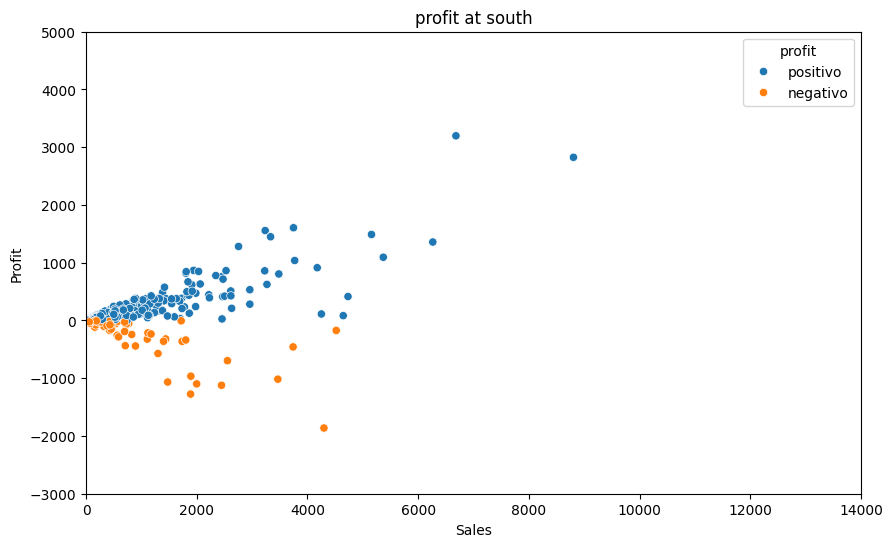

In [30]:
# Distribution of sales and profits by customers in the Central region

df_sou_customer=pd.DataFrame(df_sou.groupby('Customer Name')['Sales'].sum())
df_sou_customer['Profit']=pd.DataFrame(df_sou.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'negativo'
    else:
        return 'positivo'

df_sou_customer.loc[:,'profit']=df_sou_customer.loc[:,'Profit'].apply(type)

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_sou_customer, hue='profit',x='Sales',y='Profit')
plt.title("profit at south") 
plt.xlim(0, 14000)
plt.ylim(-3000, 5000)
plt.show()

<h3>"Let's now look at a comparison between the number of units sold for each category and   total sales by category ."</h3>

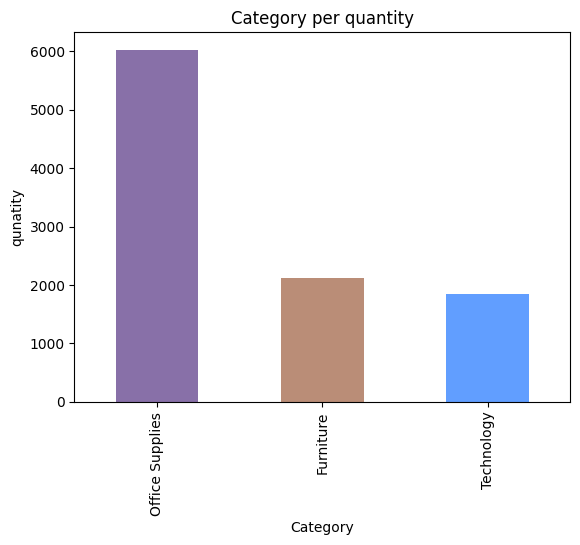

<Figure size 800x500 with 0 Axes>

In [31]:
top_categories_per_quantity = df.Category.value_counts()
top_categories_per_quantity.plot(kind="bar" , color = ["#6A4C93" , '#A97155' , '#3A86FF'] , alpha= 0.8)
plt.title("Category per quantity")
plt.xlabel("Category")
plt.ylabel("qunatity")
plt.figure(figsize=(8, 5))

plt.tight_layout()

plt.show()

In [32]:
top_categories_per_sales = df.groupby("Category").Sales.sum().sort_values(ascending=False).reset_index().round(2)

In [33]:
category_revenue_df = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
category_revenue=category_revenue_df.reset_index()
# Calculate total revenue
total_revenue = category_revenue['Sales'].sum()

# Create an interactive bar chart
fig = px.bar(
    category_revenue,
    x='Category',
    y='Sales',
    title='Revenue generated by each category',
    labels={'Sales': 'Total Revenue ($)', 'Category': 'Product Category'},
    hover_data={'Category': True, 'Sales': ':.2f'},  # Shows revenue on hover
    text='Sales',  # Show revenue values on bars
    color='Sales',  # Adds a gradient color effect
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Add total revenue annotation
fig.add_annotation(
    x=0.5, y=max(category_revenue['Sales']) * 1.1,  # Positioning above the highest bar
    text=f"Total Revenue: ${total_revenue:,.2f}",
    showarrow=False,
    font=dict(size=14, color="black"),
    xref="paper", yref="y"
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability
fig.show()

##### We can see that Category - Technology generated the highest revenue of about $$827426
##### The Total Revenue generated by all the categories - $2261536

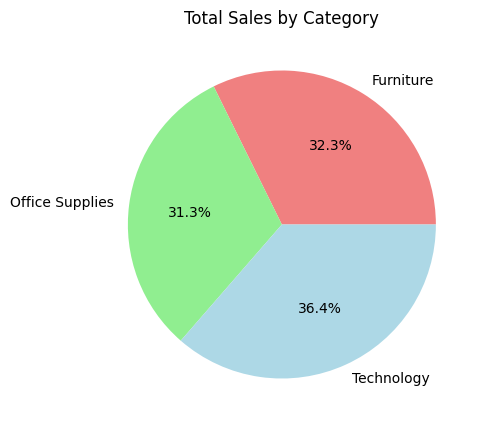

In [34]:
# Examine Total Sales ratio by category
sales_by_category = df.groupby('Category', observed=False)['Sales'].sum()
plt.figure(figsize=(5, 5))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Total Sales by Category')
plt.show()

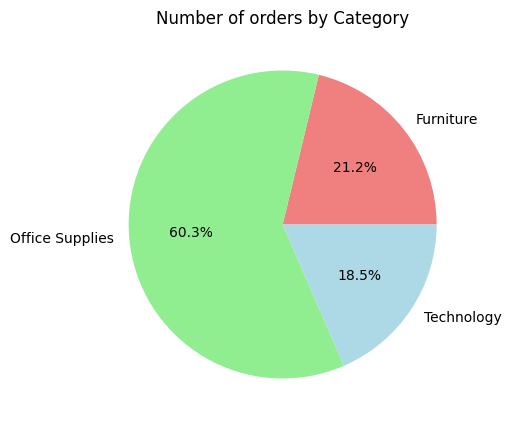

In [35]:
# Examine Number of orders ratio by category
num_orders_by_category = df.groupby('Category', observed=False)['Row ID'].count()
plt.figure(figsize=(5, 5))
plt.pie(num_orders_by_category, labels=num_orders_by_category.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Number of orders by Category')
plt.show()

<h2> Which products are the most sold? </h2>

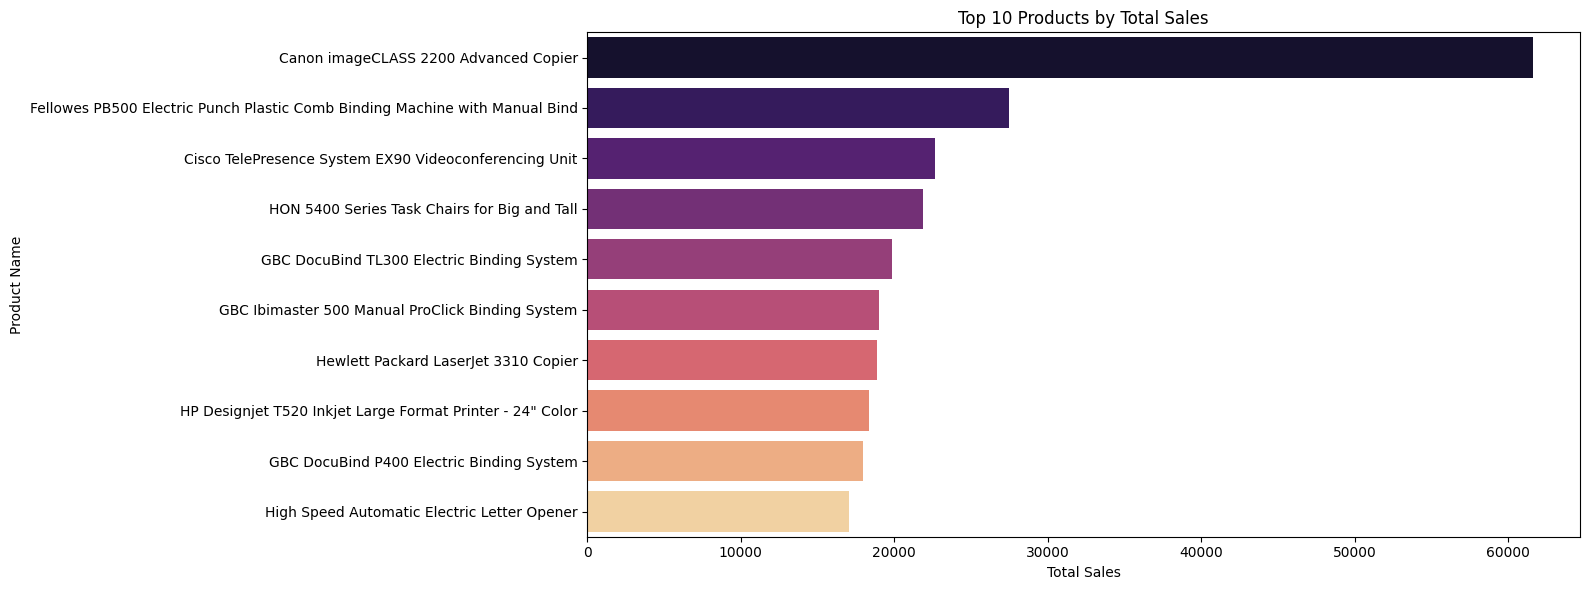

In [36]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [37]:
most_ordered_products = df.groupby('Product Name')['Order ID'].nunique().sort_values(ascending=False).head(10)

most_ordered_products=most_ordered_products.reset_index()
most_ordered_products

# Create a bar chart
import plotly.express as px

fig = px.bar(
    most_ordered_products,
    x='Product Name',
    y='Order ID',
    title="Top 10 Most Ordered Products",
    labels={'Order Count': 'Number of Orders', 'Product Name': 'Product'},
    hover_data={'Product Name': True, 'Order ID': True},  
    text='Order ID',  
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, width=900, height=600)

fig.show()

#### Which products contributed most to the revenue?

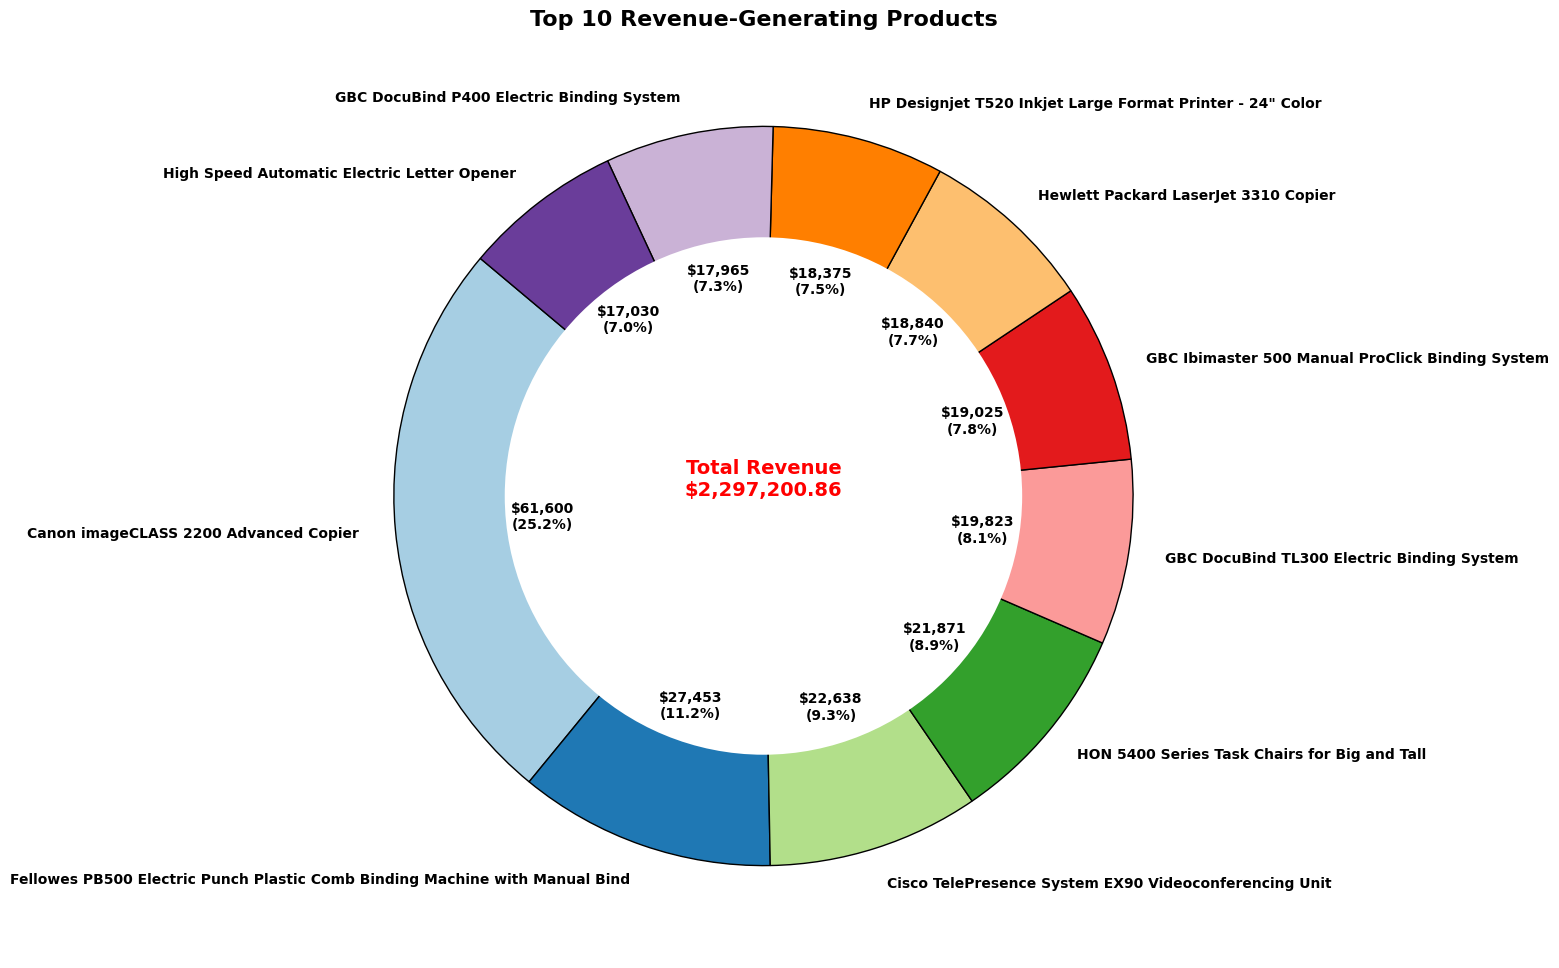

In [38]:


# Grouping by Product Name and summing Sales
top_products_df = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)


top_products = top_products_df.reset_index()

# Total revenue 
total_revenue = df['Sales'].sum()


# Creating the donut chart
plt.figure(figsize=(12, 12))  # Bigger chart for clarity
colors = plt.cm.Paired.colors  # Nice color scheme

# Custom function to show both value & percentage
def value_and_percent(val):
    total = sum(top_products['Sales'])
    absolute = int(round((val * total) / 100))  # Convert percentage to actual sales value
    return f"${absolute:,}\n({val:.1f}%)"  # Show both value and percentage

# Create donut chart
wedges, texts, autotexts = plt.pie(
    top_products['Sales'], 
    labels=top_products['Product Name'], 
    autopct=value_and_percent,  # Display both $ values and %
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'},  # Edge for clarity
    textprops={'fontsize': 10, 'weight': 'bold'}  # Larger font
)

# Add a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add total revenue in the center

plt.text(0, 0, f'Total Revenue\n${total_revenue:,.2f}', fontsize=14, fontweight='bold', color='red', ha='center')

# Show chart
plt.title("Top 10 Revenue-Generating Products", fontsize=16, fontweight='bold')
plt.show()

#### Which products contributed less to the revenue?

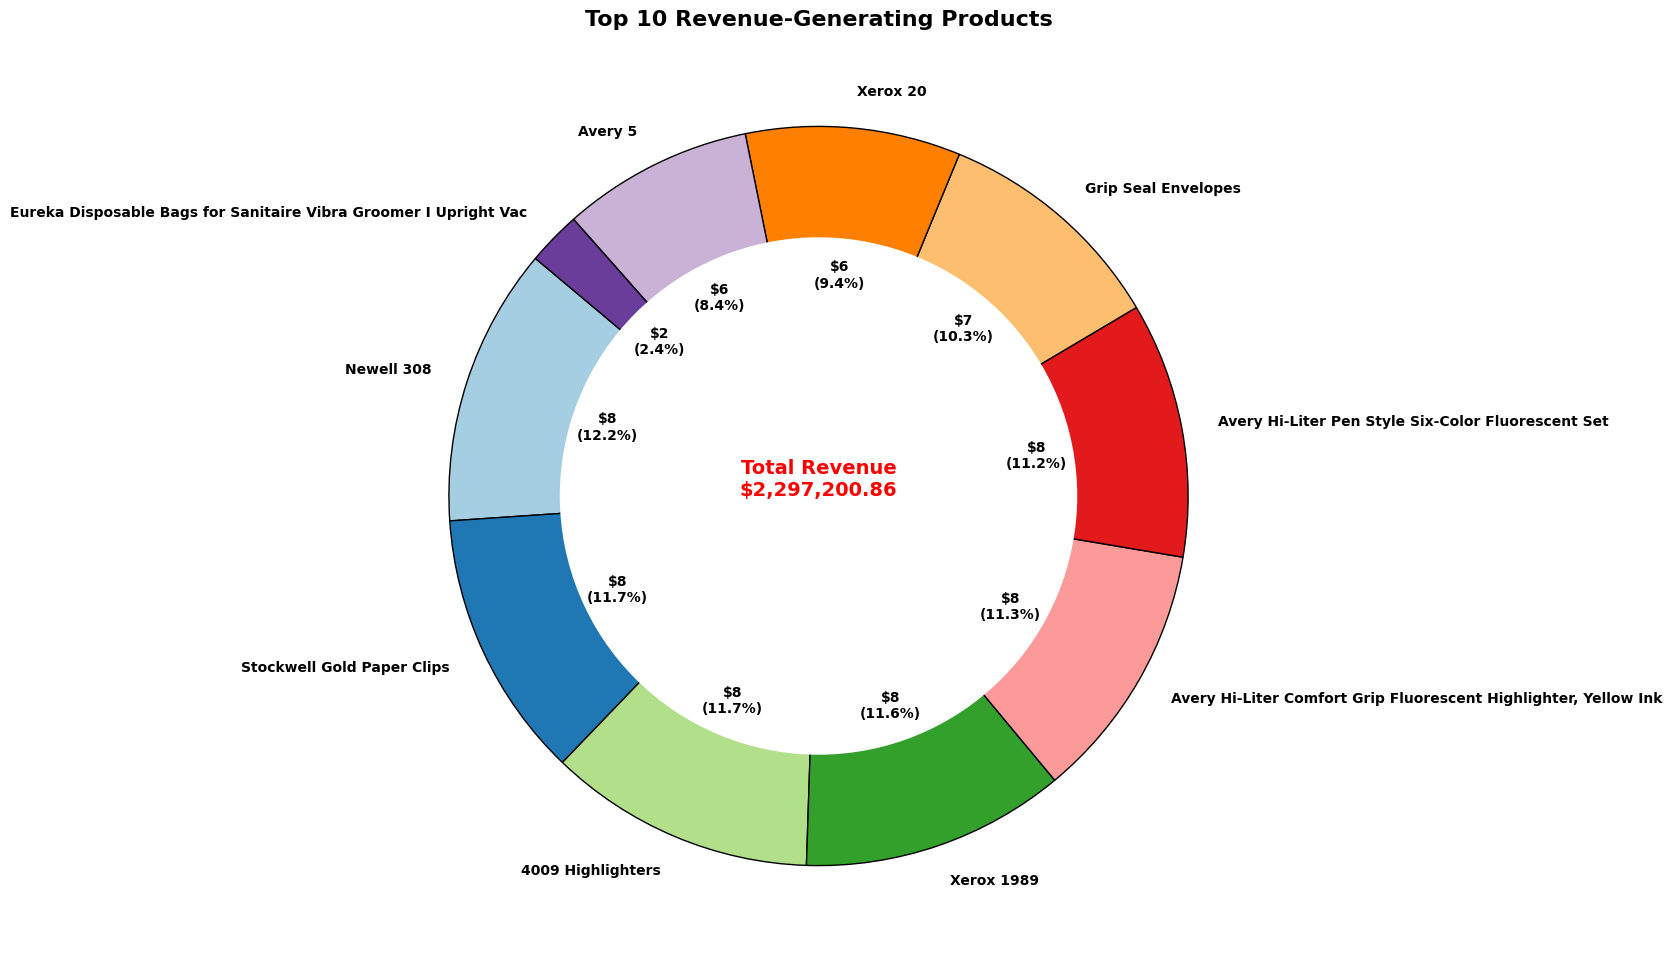

In [39]:


# Grouping by Product Name and summing Sales
list_products_df = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).tail(10)


list_products = list_products_df.reset_index()

# Total revenue 
total_revenue = df['Sales'].sum()


# Creating the donut chart
plt.figure(figsize=(12, 12))  # Bigger chart for clarity
colors = plt.cm.Paired.colors  # Nice color scheme

# Custom function to show both value & percentage
def value_and_percent(val):
    total = sum(list_products['Sales'])
    absolute = int(round((val * total) / 100))  # Convert percentage to actual sales value
    return f"${absolute:,}\n({val:.1f}%)"  # Show both value and percentage

# Create donut chart
wedges, texts, autotexts = plt.pie(
    list_products['Sales'], 
    labels=list_products['Product Name'], 
    autopct=value_and_percent,  # Display both $ values and %
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'},  # Edge for clarity
    textprops={'fontsize': 10, 'weight': 'bold'}  # Larger font
)

# Add a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add total revenue in the center

plt.text(0, 0, f'Total Revenue\n${total_revenue:,.2f}', fontsize=14, fontweight='bold', color='red', ha='center')

# Show chart
plt.title("Top 10 Revenue-Generating Products", fontsize=16, fontweight='bold')
plt.show()

##### We can see that Product - Canon imageCLASS 2200 Advanced Copier generated the highest revenue of about  $61600$ which 25.2% of total revenue of these products
##### The Total Revenue generated by all these products - $244,620.20

#### Let's look at the revenue generated by each Sub-Category

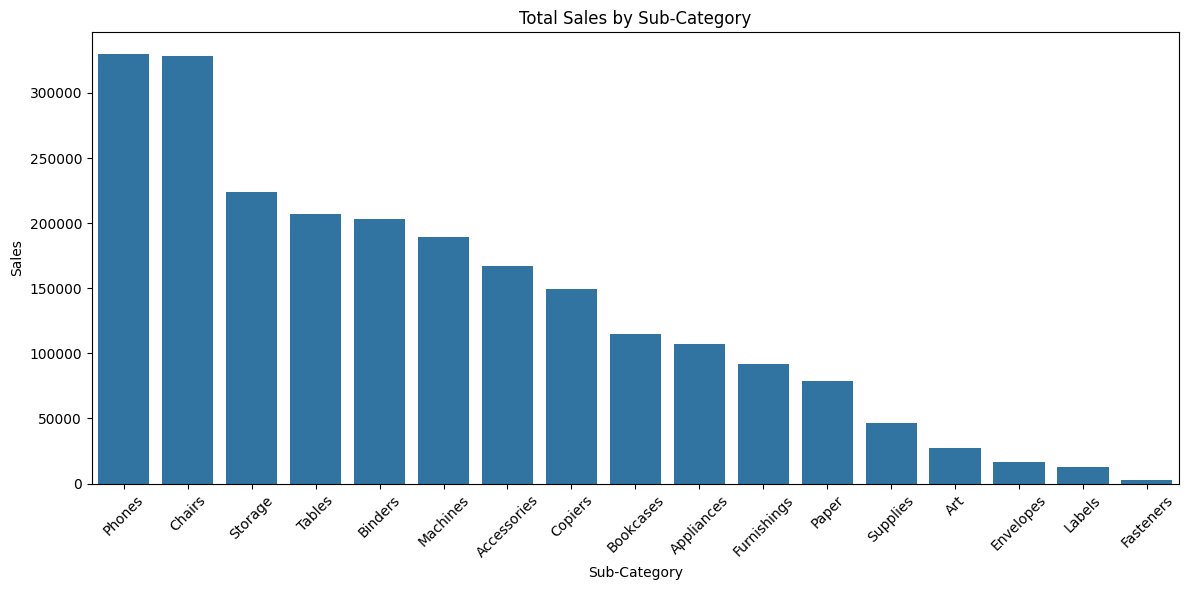

In [40]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

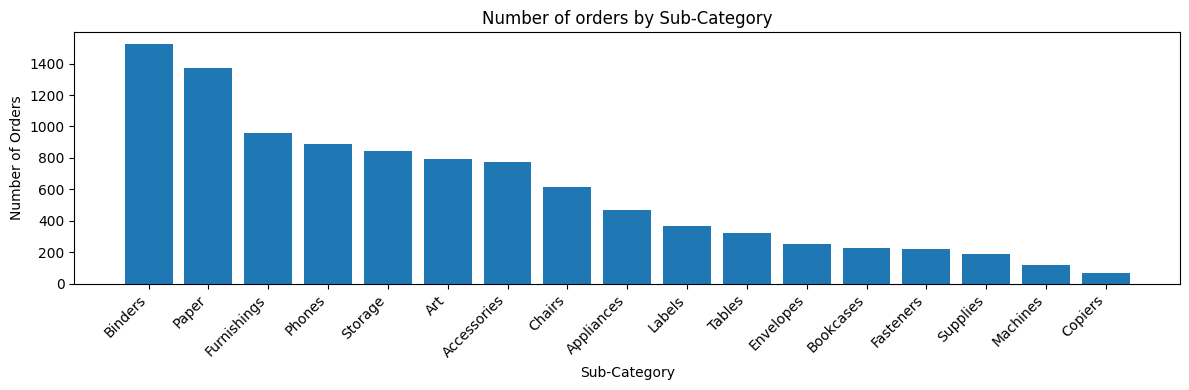

In [41]:
# Examine Number of orders by sub-category
num_orders_by_subcategory = df.groupby('Sub-Category', observed=False)['Row ID'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(num_orders_by_subcategory.index, num_orders_by_subcategory.values)
plt.title('Number of orders by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'amount')

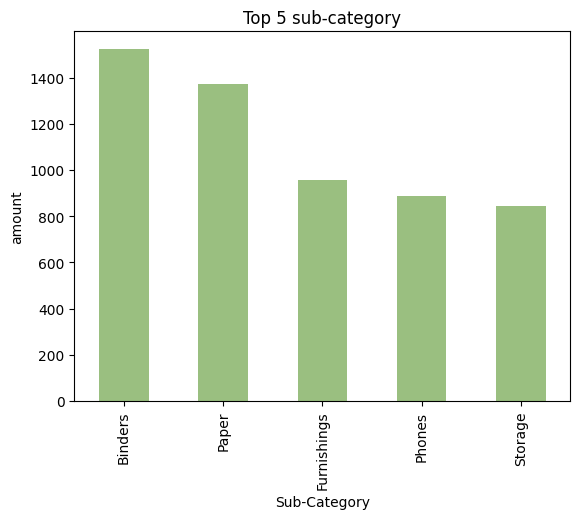

In [42]:
top_sub_categories = df["Sub-Category"].value_counts().head(5)
top_sub_categories.plot(kind="bar" , color="#9ABF80")
plt.title("Top 5 sub-category")
plt.ylabel("amount")


In [43]:
import plotly.express as px

# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a nested pie chart
fig = px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales')

fig.show()

##### We can see that Sub-Category - Phones generated the highest revenue of about $327782

#### Which Segment has the highest sales?

In [44]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

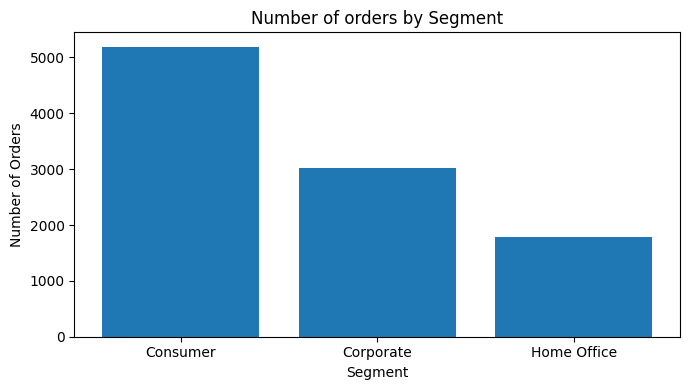

In [45]:
# Examine Number of orders by Segment
num_orders_by_segment = df.groupby('Segment', observed=False)['Row ID'].count()
plt.figure(figsize=(7, 4))
plt.bar(num_orders_by_segment.index, num_orders_by_segment.values)
plt.title('Number of orders by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [46]:
segment_revenue_df = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_revenue=segment_revenue_df.reset_index()
# Calculate total revenue
total_revenue = segment_revenue['Sales'].sum()

# Create an interactive bar chart
fig = px.bar(
    segment_revenue,
    x='Segment',
    y='Sales',
    title='Revenue generated by each Segment',
    labels={'Sales': 'Total Revenue ($)', 'Segment': 'Segment'},
    hover_data={'Segment': True, 'Sales': ':.2f'},  # Shows revenue on hover
    text='Sales',  # Show revenue values on bars
    color='Sales',  # Adds a gradient color effect
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Add total revenue annotation
fig.add_annotation(
    x=0.5, y=max(segment_revenue['Sales']) * 1.1,  # Positioning above the highest bar
    text=f"Total Revenue: ${total_revenue:,.2f}",
    showarrow=False,
    font=dict(size=14, color="black"),
    xref="paper", yref="y"
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability

fig.show()

##### We can see that Segment - Consumer generated the highest revenue of about $1148061$
##### The Total Revenue generated by all the segments - $2261536

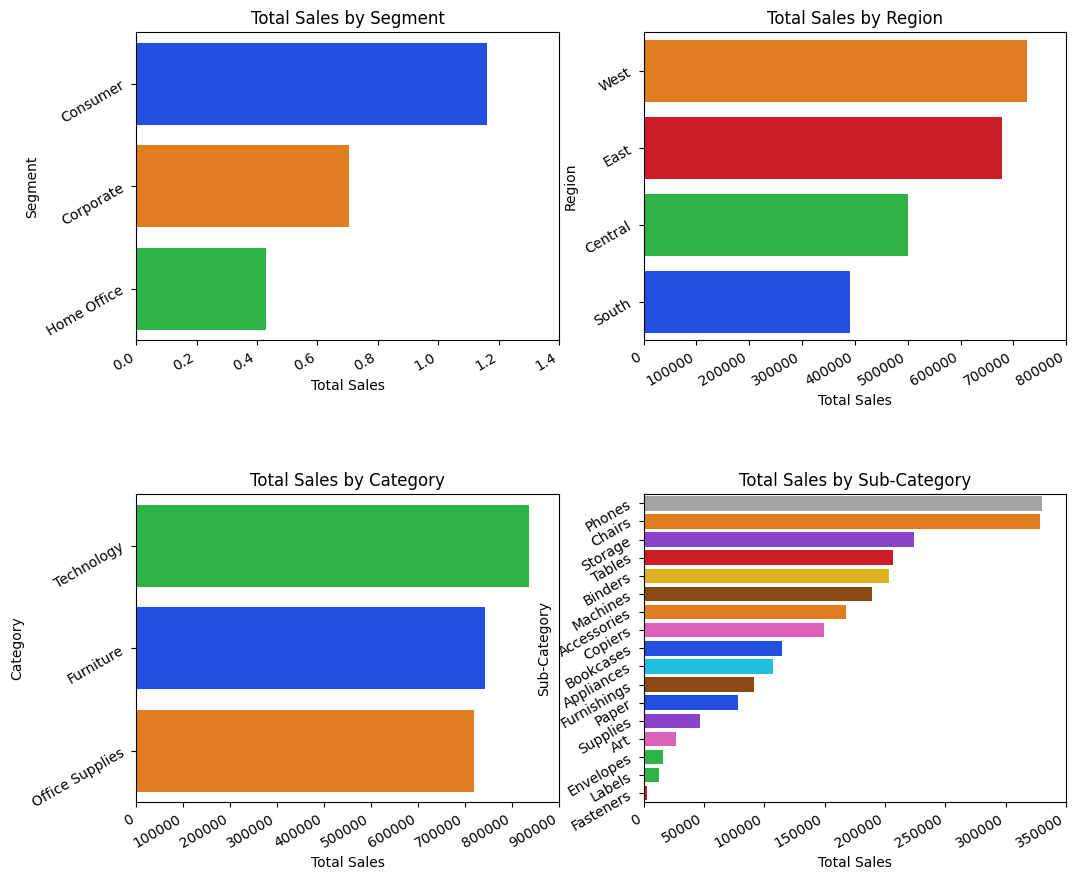

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

columns = ['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    
    order = df.groupby(column)['Sales'].sum().sort_values(ascending=False).index
    
    sns.barplot(
        x='Sales',
        y=column,
        data=df,
        estimator=np.sum,
        errorbar=None,
        palette='bright',
        ax=ax,
        order=order,           
        hue=column
    )
    
    ax.set_xlabel('Total Sales')
    ax.set_title(f'Total Sales by {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')
    ax.legend().remove()

plt.show()


#### Which shipping mode has the highest sales?

In [48]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [49]:
ship_mode_revenue= df.groupby("Ship Mode").Sales.sum().sort_values(ascending=False).round(2).reset_index()
ship_mode_revenue

,Ship Mode,Sales
0,Standard Class,1358215.74
1,Second Class,459193.57
2,First Class,351428.42
3,Same Day,128363.12


        Ship Mode       Sales
0  Standard Class  1358215.74
1    Second Class   459193.57
2     First Class   351428.42
3        Same Day   128363.12


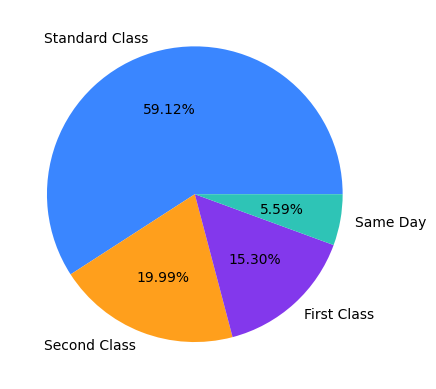

In [50]:
plt.pie(ship_mode_revenue["Sales"] , labels = ship_mode_revenue["Ship Mode"]  , colors = ['#3A86FF', '#FF9F1C', '#8338EC', '#2EC4B6'] , autopct= "%1.2f%%")
print(ship_mode_revenue)
plt.show()

In [51]:
shipmode_revenue_df = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
shipmode_revenue=shipmode_revenue_df.reset_index()
# Calculate total revenue
total_revenue = shipmode_revenue['Sales'].sum()

# Create an interactive bar chart
fig = px.bar(
    shipmode_revenue,
    x='Ship Mode',
    y='Sales',
    title='Revenue generated by each Ship Mode',
    labels={'Sales': 'Total Revenue ($)', 'Ship Mode': 'Ship Mode'},
    hover_data={'Ship Mode': True, 'Sales': ':.2f'},  # Shows revenue on hover
    text='Sales',  # Show revenue values on bars
    color='Sales',  # Adds a gradient color effect
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Add total revenue annotation
fig.add_annotation(
    x=0.5, y=max(shipmode_revenue['Sales']) * 1.1,  # Positioning above the highest bar
    text=f"Total Revenue: ${total_revenue:,.2f}",
    showarrow=False,
    font=dict(size=14, color="black"),
    xref="paper", yref="y"
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability

fig.show()

##### We can see that Shipping mode - Standard Class generated the highest revenue of about $1340831$
##### The Total Revenue generated by all the shipping modes - $2261536

### Sales & Revenue Trends

In [52]:
# Summarize the Sales data by Category, Ship Mode and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Create a treemap
fig = px.treemap(df_summary, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales')

fig.show()

## Explore some interesting facts about the dataset <a name="data_understanding__explore_interesting_facts" id="data_understanding__explore_interesting_facts"></a>

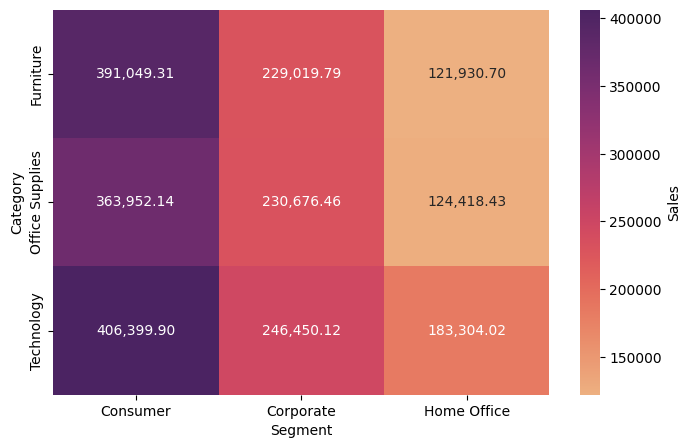

In [53]:
# Explore sales amount across Categories and Segments
temp_pivot_table = df.pivot_table(index='Category', columns='Segment', values='Sales', aggfunc='sum')
plt.figure(figsize=(8,5))
sns.heatmap(temp_pivot_table, cbar_kws={'label':'Sales'}, cmap='flare', fmt=',.2f', annot=True)
plt.show()

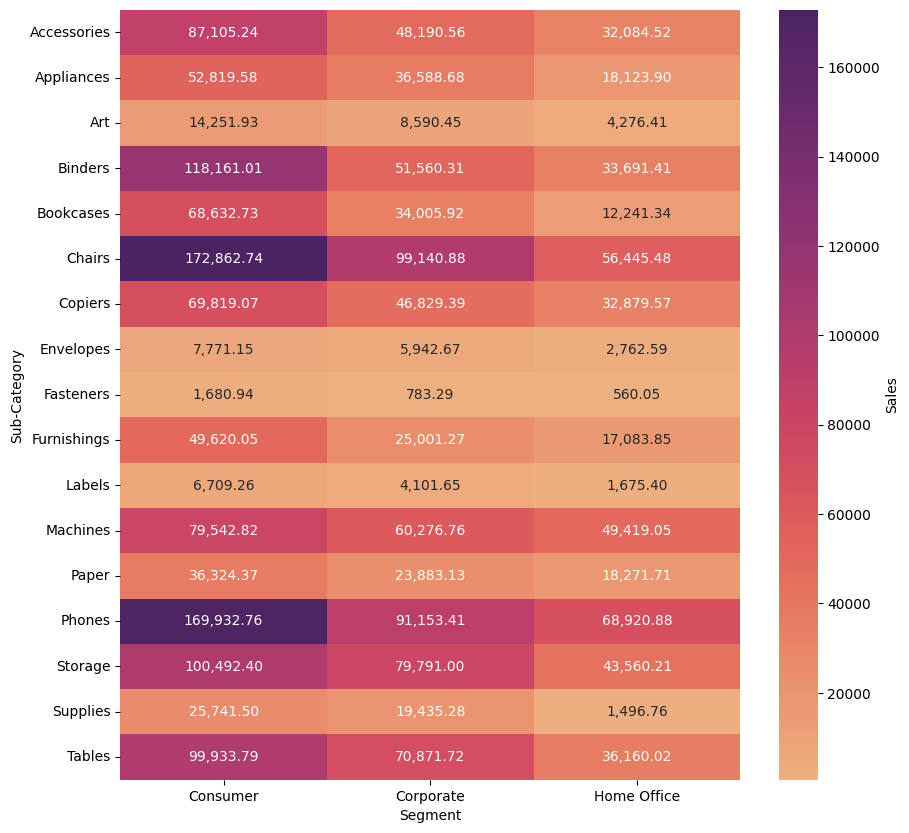

In [54]:
# Explore sales amount across Subcategories and Segments
temp_pivot_table = df.pivot_table(index='Sub-Category', columns='Segment', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,10))
sns.heatmap(temp_pivot_table, cbar_kws={'label':'Sales'}, cmap='flare', fmt=',.2f', annot=True)
plt.show()

<h2>Let's have a look at the sales growth over time </h2>


In [55]:
df["Monthly_year"]=df["Order Date"].dt.to_period("M")


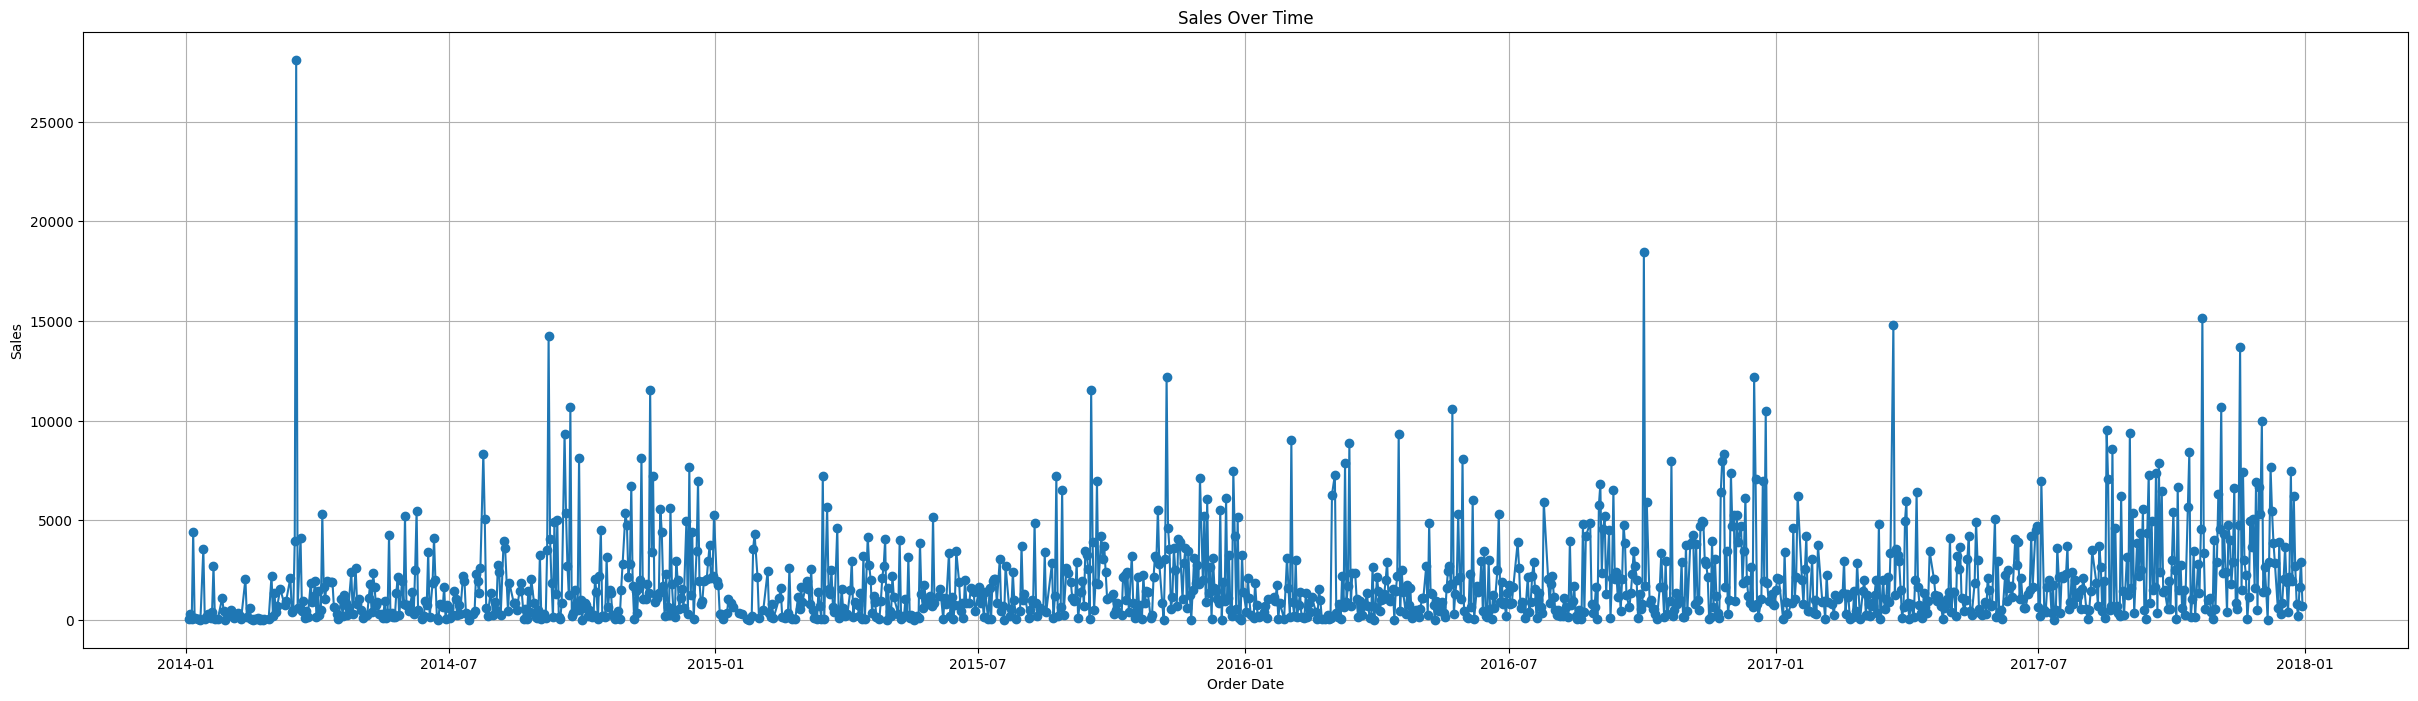

In [56]:
# Group by "Order Date" and calculate the sum of sales
df_summary = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(30, 8))
plt.plot(df_summary['Order Date'], df_summary['Sales'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()

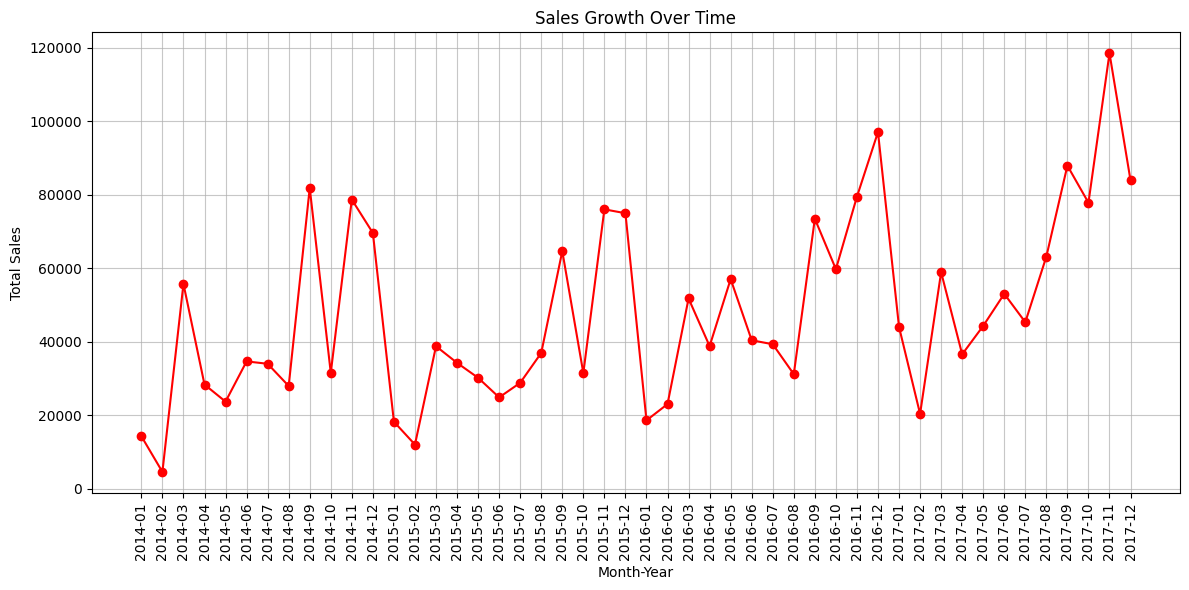

In [57]:
# Group by Monthly_year and calculate total sales
monthly_sales = df.groupby("Monthly_year").Sales.sum()

# Create line plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o' , color = "Red")
plt.title("Sales Growth Over Time")
plt.xlabel("Month-Year") 
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


In [58]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Order Date')

monthly_sales = daily_sales.set_index('Order Date').resample('ME').mean()

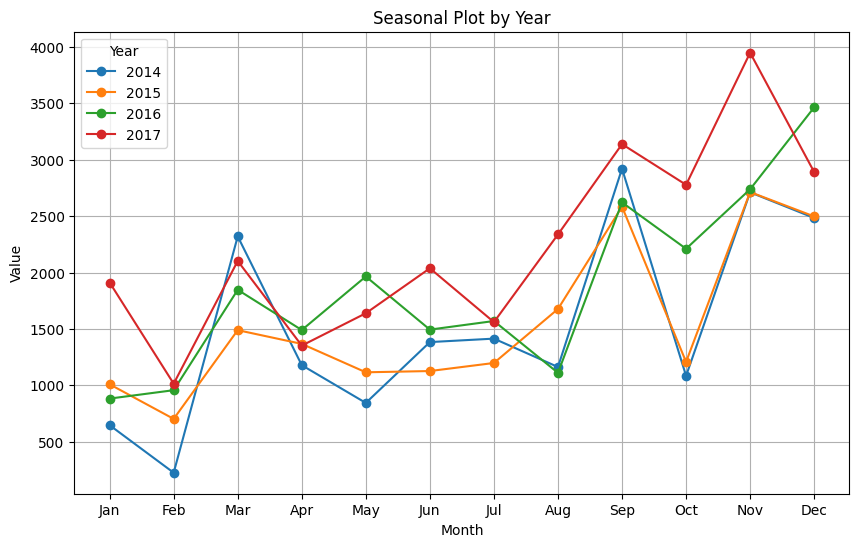

In [59]:
df2 = monthly_sales.copy()
df2['year'] = df2.index.year
df2['month'] = df2.index.strftime('%b')
df2['month_num'] = df2.index.month

df2 = df2.sort_values('month_num')

pivot = df2.pivot_table(index='month', columns='year', values='Sales', aggfunc='sum')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot = pivot.reindex(month_order)

plt.figure(figsize=(10, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=year)

plt.title('Seasonal Plot by Year')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year')
plt.grid(True)
plt.show()